1- Libreria y configuraciones

In [1]:
%%time

# Installing select libraries:-
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages

import re # regular expressions

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # statistical functions

from itertools import cycle, combinations  # Igenerating combinations & cycle

import matplotlib.pyplot as plt # data visualization
from matplotlib.ticker import FuncFormatter  # For custom formatting of ticks
from matplotlib.ticker import FormatStrFormatter  # For formatting ticks with a string
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D axes module
from matplotlib.colors import ListedColormap  # Importing colormap for scatter plot
import seaborn as sns # statistical data visualization
from wordcloud import WordCloud  # Importing WordCloud library for textual data visualization

from io import StringIO

filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display, HTML, display_html, clear_output; # displaying HTML content


clear_output();
print();
collect();


CPU times: total: 2.34 s
Wall time: 2min 2s


In [4]:
!pip install scipy
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
class color:
    GREEN = '\033[92m'
    END = '\033[0m'


In [3]:
# Set the plot style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"{color.GREEN}Succesfully Configured libraries!{color.END}")

Succesfully Configured libraries!


Step 2 | Load Dataset

In [4]:
%%time

# Clase para aplicar color al texto en consola (opcional)
class color:
    GREEN = '\033[92m'
    RED = '\033[91m'
    BLUE = '\033[94m'
    END = '\033[0m'

from gc import collect
import pandas as pd

# Error Handling When Loading Dataset with Pandas read_csv
try:
    # Intenta leer el dataset desde la ruta local
    df = pd.read_csv('global_ai_ml_data_salaries.csv')
    print(f"{color.GREEN}Dataset loaded successfully.{color.END}")
    
except FileNotFoundError:
    print(f"{color.RED}Error: File not found. Please check the file path.{color.END}")

except Exception as e:
    print(f"{color.RED}An error occurred while loading the dataset: {e}{color.END}")

# Mostrar texto en azul como referencia
print(color.BLUE)

# Liberar memoria
collect()


Dataset loaded successfully.

CPU times: total: 219 ms
Wall time: 1.26 s


6

Step 3 | Attribute Overview

In [5]:
from IPython.display import display, HTML
import pandas as pd
import io

def display_dataframe_with_custom_header(df, show_head=True):
    # Captura df.info()
    buffer = io.StringIO()
    df.info(buf=buffer)
    info_str = buffer.getvalue().replace("\n", "<br>")

    # CSS + HTML
    style = """
    <style>
        .header {
            font-size: 22px;
            font-weight: bold;
            color: #e74c3c;
            font-family: 'Segoe UI', sans-serif;
            margin-top: 15px;
        }
        .header span {
            color: #f1c40f;
        }
        .info-box {
            background-color: #2d2f33;
            color: #f1f1f1;
            font-family: 'Courier New', monospace;
            padding: 15px;
            border-radius: 6px;
            margin-top: 10px;
        }
        .data-preview table {
            border-collapse: collapse;
            width: 100%;
            font-family: 'Segoe UI', sans-serif;
        }
        .data-preview th {
            background-color: #34495e;
            color: white;
            padding: 8px;
        }
        .data-preview td {
            background-color: #ecf0f1;
            color: #2c3e50;
            padding: 8px;
        }
        .data-preview tr:nth-child(even) td {
            background-color: #dfe6e9;
        }
    </style>
    """

    header_html = "<div class='header'><span>DATA</span>FRAME INFORMATION</div>"
    info_html = f"<div class='info-box'>{info_str}</div>"

    if show_head:
        head_title = "<div class='header'><span>🔍</span> DATAFRAME HEAD</div>"
        head_html = head_title + df.head().to_html(classes='data-preview', index=False)
    else:
        head_html = ""

    display(HTML(style + header_html + info_html + head_html))


In [23]:
display_dataframe_with_custom_header(df)  # Display info

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2024,SE,FT,Research Engineer,284900,USD,284900,US,0,US,M
2024,SE,FT,Research Engineer,161700,USD,161700,US,0,US,M
2024,MI,FT,Research Engineer,138000,USD,138000,US,0,US,M
2024,MI,FT,Research Engineer,86000,USD,86000,US,0,US,M
2024,SE,FT,Research Engineer,179000,USD,179000,US,0,US,M


Step 4 | Missing Value Handling

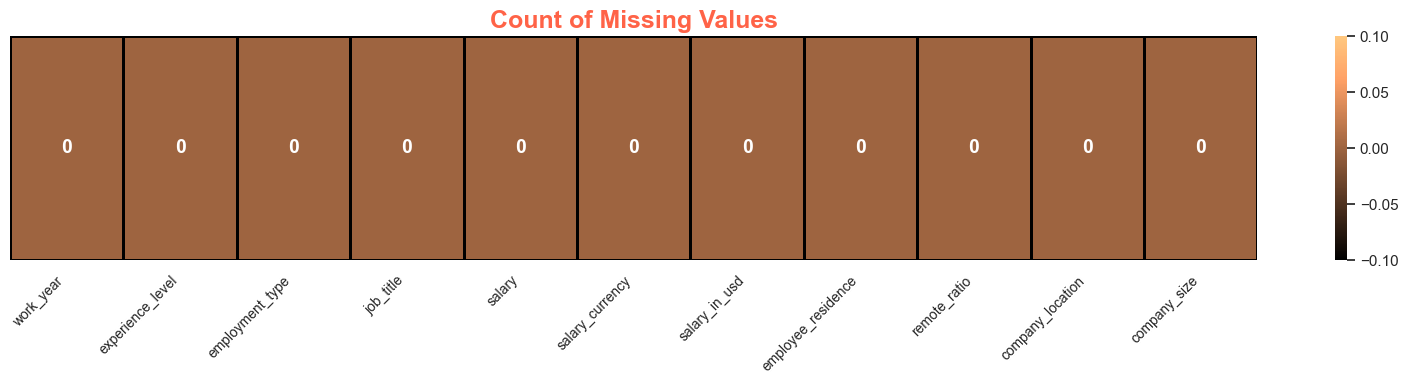

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

def plot_missing_counts_heatmap(df):
    # Crear DataFrame con 1 fila y columnas iguales a df
    missing_counts = df.isnull().sum().to_frame().T

    # Crear figura
    plt.figure(figsize=(16, 4))
    ax = sns.heatmap(
        missing_counts,
        annot=True,
        fmt="d",
        cmap="copper",
        linewidths=1,
        linecolor='black',
        cbar=True,
        annot_kws={"fontsize": 14, "weight": "bold", "color": "white"}
    )

    plt.title("Count of Missing Values", fontsize=18, color="tomato", weight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks([])  # Ocultar etiquetas del eje Y
    ax.set_facecolor('lightgrey')  # Fondo del gráfico
    plt.tight_layout()
    plt.show()

# Llamar a la función con tu DataFrame (asegúrate de que 'df' esté definido)
plot_missing_counts_heatmap(df)


In [35]:
# Call the function to plot the heatmap
display_missing_values_table(df)

✅ No hay valores nulos en el dataset.


Step 5 | Duplicate Value Manage

In [37]:
# Definir colores ANSI para impresión en consola
class color:
    RED = '\033[91m'
    BLUE = '\033[94m'
    BOLD = '\033[1m'
    END = '\033[0m'

# Verificar valores duplicados
duplicate_values = df.duplicated().sum()
print(color.BLUE + f'The data contains {color.BOLD}{color.RED}{duplicate_values}{color.END}{color.BLUE} duplicate values' + color.END)

# Eliminar duplicados
df_no_duplicates = df.drop_duplicates()


The data contains 8668 duplicate values


In [43]:
import pandas as pd

# Creamos una serie booleana: True si la columna tiene valores duplicados
duplicates_by_column = df.apply(lambda col: col.duplicated().any())
duplicates_df = duplicates_by_column.to_frame(name="0")

# Aplicamos estilo: verde si es False, rojo si es True
styled_duplicates = duplicates_df.style.applymap(
    lambda val: 'color: green; font-weight: bold' if val == False else 'color: green; font-weight: bold'
)

# Mostrar
styled_duplicates


,0
work_year,True
experience_level,True
employment_type,True
job_title,True
salary,True
salary_currency,True
salary_in_usd,True
employee_residence,True
remote_ratio,True
company_location,True


Step 6 | Statistical Data Summary

In [49]:
def calculate_statistics(df, opacity=0.3, font_size='16px'):
    numeric_df = df.select_dtypes(include=[np.number])

    stats = pd.DataFrame(index=[
        'Mean', 'Median', 'Mode', 'Range', 'Stdev', 'Variance', 'IQR',
        '25%', '50%', '75%', 'Min', 'Max', 'Skewness', 'Kurtosis'
    ])

    for col in numeric_df.columns:
        data = numeric_df[col].dropna()

        mode = data.mode()
        mode_value = mode.iloc[0] if not mode.empty else np.nan

        iqr = data.quantile(0.75) - data.quantile(0.25)

        stats[col] = [
            data.mean(),
            data.median(),
            mode_value,
            data.max() - data.min(),
            data.std(),
            data.var(),
            iqr,
            data.quantile(0.25),
            data.quantile(0.50),
            data.quantile(0.75),
            data.min(),
            data.max(),
            skew(data),
            kurtosis(data)
        ]

    stats = stats.round(2)

    styled = stats.style.set_properties(**{
        'background-color': f'rgba(173, 216, 230, {opacity})',  # azul súper clarito
        'color': 'black',
        'font-size': font_size,
        'border': '1px solid #ADD8E6',
    }).set_table_styles([{
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black'), ('font-weight', 'bold')]
    }])

    return styled

In [50]:
# Example usage:
# Assuming you have a DataFrame called 'df' and want to set transparency to 0.5
stats_df = calculate_statistics(df, opacity=0.4, font_size='19px')
stats_df

,work_year,salary,salary_in_usd,remote_ratio
Mean,2023.380000,162503.520000,151029.730000,29.430000
Median,2023.000000,143000.000000,142200.000000,0.000000
Mode,2024.000000,100000.000000,150000.000000,0.000000
Range,4.000000,30386000.000000,785000.000000,100.000000
Stdev,0.710000,307049.720000,68579.480000,45.230000
Variance,0.500000,94279528420.229996,4703144919.030000,2046.060000
IQR,1.000000,86500.000000,86750.000000,100.000000
25%,2023.000000,103500.000000,103000.000000,0.000000
50%,2023.000000,143000.000000,142200.000000,0.000000
75%,2024.000000,190000.000000,189750.000000,100.000000


In [54]:
def variable_summary(df, opacity=0.3, font_size='16px'):
    summary = pd.DataFrame({
        'Variable': df.columns,
        'Dtype': df.dtypes.values,
        'Count': df.notnull().sum().values,
        'Unique': df.nunique().values,
        'Missing': df.isnull().sum().values
    })

    styled = summary.style.set_properties(**{
        'background-color': f'rgba(173, 216, 230, {opacity})',  # azul clarito con opacidad
        'color': 'black',
        'font-size': font_size,
        'border': '1px solid #ADD8E6',
    }).set_table_styles([{
        'selector': 'th',
        'props': [('background-color', 'white'), ('color', 'black'), ('font-weight', 'bold')]
    }])

    return styled


In [55]:
styled_summary = variable_summary(df, opacity=0.4, font_size='18px')
display(styled_summary)  # En Jupyter


,Variable,Dtype,Count,Unique,Missing
0,work_year,int64,20565,5,0
1,experience_level,object,20565,4,0
2,employment_type,object,20565,4,0
3,job_title,object,20565,153,0
4,salary,int64,20565,3023,0
5,salary_currency,object,20565,24,0
6,salary_in_usd,int64,20565,3424,0
7,employee_residence,object,20565,88,0
8,remote_ratio,int64,20565,3,0
9,company_location,object,20565,78,0
